# Nearest Neighbors


In [3]:
import pandas as pd
import matplotlib.pyplot as plt          # plotting
import numpy as np                       # dense matrices
from scipy.sparse import csr_matrix      # sparse matrices
%matplotlib inline

In [4]:
wiki = pd.read_csv('data/people_wiki.csv')

In [5]:
def load_sparse_csr(filename):
    loader = np.load(filename)
    data = loader['data']
    indices = loader['indices']
    indptr = loader['indptr']
    shape = loader['shape']
    
    return csr_matrix( (data, indices, indptr), shape)

In [6]:
word_count = load_sparse_csr('data/people_wiki_word_count.npz')

In [7]:
import json
with open('data/people_wiki_map_index_to_word.json', 'r') as f:
    map_index_to_word  = json.load(f)


In [8]:
list(map_index_to_word.keys())

['biennials',
 'lb915',
 'shatzky',
 'woode',
 'damfunk',
 'nualart',
 'hatefillot',
 'missionborn',
 'yeardescribed',
 'theoryhe',
 'vinalop',
 'soestdijk',
 'boncea',
 'spiders',
 'bienniale',
 'woody',
 'trawling',
 'pampoulovawagner',
 'bentara',
 'laserbased',
 'caner',
 'canes',
 'canet',
 'iaspark',
 'categoriesborn',
 '5982',
 'caney',
 'phosphorushe',
 'yusaf',
 'hhsoffice',
 '5985',
 'fsos',
 'caned',
 'gaa',
 'iguau',
 'storiesin',
 'braziljorge',
 'iguaz',
 'kealhofer',
 'canek',
 '2116',
 'canem',
 'victorialooking',
 'martre',
 'lippert',
 'pagesolove',
 'sowell',
 'weiskopfs',
 'hedquist',
 'andersanders',
 'raouf',
 'steppaillen',
 'fjate',
 'heroesin',
 'executivemanager',
 'papanastassiouwasserburgs',
 'superpowered',
 'voiceactress',
 'fullblooded',
 'genocidekamuhanda',
 'radkes',
 'composertippett',
 'grueling',
 'season1bouyer',
 'wooden',
 'comicborn',
 'virtuosos',
 'raoul',
 'illinoisrockefellersilvia',
 'nielsenfunk',
 'woodes',
 '598m',
 'semiautomatic',
 'im

# Find nearest neighbors using word count vectors


In [9]:
from sklearn.neighbors import NearestNeighbors

model = NearestNeighbors(metric='euclidean', algorithm='brute')
model.fit(word_count)

NearestNeighbors(algorithm='brute', metric='euclidean')

In [10]:
print(wiki[wiki['name'] == 'Barack Obama'])

                                              URI          name  \
35817  <http://dbpedia.org/resource/Barack_Obama>  Barack Obama   

                                                    text  
35817  barack hussein obama ii brk husen bm born augu...  


Let us run the k-nearest neighbor algorithm with Obama's article. Since the NearestNeighbor class expects a vector, we pass the 35817th row of word_count vector.

In [11]:
distances, indices = model.kneighbors(word_count[35817], n_neighbors=10) # 1st arg: word count vector

In [12]:
indices.flatten().tolist()

[35817, 24478, 28447, 35357, 14754, 13229, 31423, 22745, 36364, 9210]

In [13]:
wiki['name'].iloc[indices.flatten().tolist()].values

array(['Barack Obama', 'Joe Biden', 'George W. Bush', 'Lawrence Summers',
       'Mitt Romney', 'Francisco Barrio', 'Walter Mondale',
       'Wynn Normington Hugh-Jones', 'Don Bonker', 'Andy Anstett'],
      dtype=object)

In [14]:
neighbors=pd.DataFrame({'distance':distances.flatten(), 'id':indices.flatten(), 'name':wiki['name'].iloc[indices.flatten().tolist()].values})
neighbors.sort_values('distance')

,distance,id,name
0,0.000000,35817,Barack Obama
1,33.075671,24478,Joe Biden
2,34.394767,28447,George W. Bush
3,36.152455,35357,Lawrence Summers
4,36.166283,14754,Mitt Romney
5,36.331804,13229,Francisco Barrio
6,36.400549,31423,Walter Mondale
7,36.496575,22745,Wynn Normington Hugh-Jones
8,36.633318,36364,Don Bonker
9,36.959437,9210,Andy Anstett


In [15]:
map_index_to_word

{'biennials': 522004,
 'lb915': 116290,
 'shatzky': 127647,
 'woode': 174106,
 'damfunk': 133206,
 'nualart': 153444,
 'hatefillot': 164111,
 'missionborn': 261765,
 'yeardescribed': 161075,
 'theoryhe': 521685,
 'vinalop': 222759,
 'soestdijk': 166345,
 'boncea': 150371,
 'spiders': 519990,
 'bienniale': 429277,
 'woody': 541515,
 'trawling': 189895,
 'pampoulovawagner': 201040,
 'bentara': 202586,
 'laserbased': 25758,
 'caner': 346073,
 'canes': 478262,
 'canet': 436468,
 'iaspark': 395341,
 'categoriesborn': 12586,
 '5982': 277649,
 'caney': 459867,
 'phosphorushe': 379479,
 'yusaf': 270311,
 'hhsoffice': 141697,
 '5985': 32985,
 'fsos': 109474,
 'caned': 324502,
 'gaa': 534680,
 'iguau': 456103,
 'storiesin': 513151,
 'braziljorge': 107111,
 'iguaz': 127410,
 'kealhofer': 342134,
 'canek': 159182,
 '2116': 429919,
 'canem': 83461,
 'victorialooking': 58169,
 'martre': 111954,
 'lippert': 491344,
 'pagesolove': 33220,
 'sowell': 489254,
 'weiskopfs': 344360,
 'hedquist': 165506,
 '

In [15]:
def unpack_dict(matrix, map_index_to_word):
    #table = list(map_index_to_word.sort('index')['category'])
    table = sorted(map_index_to_word, key=map_index_to_word.get)
    
    
    data = matrix.data
    indices = matrix.indices
    indptr = matrix.indptr
    
    num_doc = matrix.shape[0]

    return [{k:v for k,v in zip([table[word_id] for word_id in indices[indptr[i]:indptr[i+1]] ],
                                 data[indptr[i]:indptr[i+1]].tolist())} \
               for i in range(num_doc) ]

wiki['word_count'] = unpack_dict(word_count, map_index_to_word)

In [16]:
def top_words(name):
    """
    Get a table of the most frequent words in the given person's wikipedia page.
    """
    row = wiki[wiki['name'] == name]
    word_count_dict = row['word_count'].iloc[0]
    word_count_table = pd.DataFrame(list(word_count_dict.items()), columns=['word', 'count'])
    return word_count_table.sort_values('count', ascending=False)

obama_words = top_words('Barack Obama')
print(obama_words)
barrio_words = top_words('Francisco Barrio')
print(barrio_words)

             word  count
272           the     40
270            in     30
271           and     21
269            of     18
266            to     14
..            ...    ...
94         budget      1
96        receive      1
99     convention      1
100     operation      1
136  representing      1

[273 rows x 2 columns]
        word  count
224      the     36
221       of     24
223      and     18
222       in     17
212       he     10
..       ...    ...
82      dark      1
83   results      1
84        60      1
85   attempt      1
112      met      1

[225 rows x 2 columns]


In [17]:
combined_words = obama_words.merge(barrio_words, on='word', how='inner',suffixes=('_obama', '_barrio'))

In [18]:
combined_words

,word,count_obama,count_barrio
0,the,40,36
1,in,30,17
2,and,21,18
3,of,18,24
4,to,14,9
5,his,11,5
6,he,7,10
7,a,7,6
8,as,6,5
9,was,5,4


In [19]:
combined_words = combined_words.rename(columns={'count_obama': 'Obama', 'count_barrio': 'Barrio'})
combined_words

,word,Obama,Barrio
0,the,40,36
1,in,30,17
2,and,21,18
3,of,18,24
4,to,14,9
5,his,11,5
6,he,7,10
7,a,7,6
8,as,6,5
9,was,5,4


In [20]:
combined_words.sort_values('Obama', ascending=False)[0:5]

,word,Obama,Barrio
0,the,40,36
1,in,30,17
2,and,21,18
3,of,18,24
4,to,14,9


How many of the articles in the Wikipedia dataset contain all of those 5 words?

In [21]:
common_words = set(combined_words.sort_values('Obama', ascending=False)[0:5]['word'])

def has_top_words(word_count_vector):
    # extract the keys of word_count_vector and convert it to a set
    unique_words = set(word_count_vector.keys())
    # return True if common_words is a subset of unique_words
    # return False otherwise
    if common_words.issubset(unique_words):
        return True
    else:
        return False

wiki['has_top_words'] = wiki['word_count'].apply(has_top_words)

# use has_top_words column to answer the quiz question
np.sum(wiki['has_top_words'].astype(int))

56066

In [22]:
print ('Output from your function:', has_top_words(wiki['word_count'][32]))
print ('Correct output: True')
print ('Also check the length of unique_words. It should be 167')
print(len(wiki['word_count'][32]))

print ('Output from your function:', has_top_words(wiki['word_count'][33]))
print ('Correct output: False')
print ('Also check the length of unique_words. It should be 188')
print(len(wiki['word_count'][33]))

Output from your function: True
Correct output: True
Also check the length of unique_words. It should be 167
167
Output from your function: False
Correct output: False
Also check the length of unique_words. It should be 188
188


In [23]:
obama_vector = word_count[wiki[wiki['name']=='Barack Obama'].index[0]]
bush_vector = word_count[wiki[wiki['name']=='George W. Bush'].index[0]]
biden_vector = word_count[wiki[wiki['name']=='Joe Biden'].index[0]]

In [24]:
from sklearn.metrics.pairwise import euclidean_distances
obama_bush = euclidean_distances(obama_vector, bush_vector)
obama_biden = euclidean_distances(obama_vector, biden_vector)
bush_biden = euclidean_distances(bush_vector, biden_vector)


In [25]:
print(obama_biden)
print(obama_bush)
print(bush_biden)

[[33.07567082]]
[[34.39476704]]
[[32.75667871]]


In [26]:
obama_words = top_words('Barack Obama')
bush_words = top_words('George W. Bush')

In [27]:
combined_words = obama_words.merge(bush_words, on='word', how='inner',suffixes=('_obama', '_barrio'))

In [28]:
combined_words.sort_values('count_obama', ascending=False)[0:10]

,word,count_obama,count_barrio
0,the,40,39
1,in,30,22
2,and,21,14
3,of,18,14
4,to,14,11
5,his,11,6
6,act,8,3
7,he,7,8
8,a,7,6
9,law,6,1


# Extract the TF-IDF vectors


In [29]:
tf_idf = load_sparse_csr('data/people_wiki_tf_idf.npz')

In [30]:
wiki['tf_idf'] = unpack_dict(tf_idf, map_index_to_word)

In [31]:
model_tf_idf = NearestNeighbors(metric='euclidean', algorithm='brute')
model_tf_idf.fit(tf_idf)

NearestNeighbors(algorithm='brute', metric='euclidean')

In [32]:
distances, indices = model_tf_idf.kneighbors(tf_idf[35817], n_neighbors=10)

In [33]:
neighbors=pd.DataFrame({'distance':distances.flatten(), 'id':indices.flatten(), 'name':wiki['name'].iloc[indices.flatten().tolist()].values})
neighbors.sort_values('distance')

,distance,id,name
0,0.000000,35817,Barack Obama
1,106.861014,7914,Phil Schiliro
2,108.871674,46811,Jeff Sessions
3,109.045698,44681,Jesse Lee (politician)
4,109.108106,38376,Samantha Power
5,109.781867,6507,Bob Menendez
6,109.957788,38714,Eric Stern (politician)
7,110.413889,44825,James A. Guest
8,110.470609,44368,Roland Grossenbacher
9,110.696998,33417,Tulsi Gabbard


In [34]:
def top_words_tf_idf(name):
    row = wiki[wiki['name'] == name]
    word_count_dict = row['tf_idf'].iloc[0]
    word_count_table = pd.DataFrame(list(word_count_dict.items()), columns=['word', 'weight'])
    return word_count_table.sort_values('weight', ascending=False)

obama_tf_idf = top_words_tf_idf('Barack Obama')
print(obama_tf_idf)

schiliro_tf_idf = top_words_tf_idf('Phil Schiliro')
print(schiliro_tf_idf)

        word     weight
71     obama  43.295653
138      act  27.678223
97      iraq  17.747379
129  control  14.887061
191      law  14.722936
..       ...        ...
267       is   0.055233
268        a   0.039334
270       in   0.028962
271      and   0.015648
272      the   0.004063

[273 rows x 2 columns]
                word     weight
1           schiliro  21.972991
42             staff  15.856442
17     congressional  13.547088
0    daschleschiliro  10.986495
13             obama   9.621256
..               ...        ...
115               of   0.037406
114                a   0.028096
116               in   0.004827
117              and   0.004471
118              the   0.001016

[119 rows x 2 columns]


In [ ]:
combined_words = obama_tf_idf.merge(schiliro_tf_idf, on='word', how='inner',suffixes=('_obama', '_schiliro'))

In [36]:
combined_words

,word,weight_obama,weight_barrio
0,obama,43.295653,9.621256
1,law,14.722936,7.361468
2,democratic,12.410689,6.205344
3,senate,10.164288,3.388096
4,presidential,7.386955,3.693478
5,president,7.226869,9.033587
6,policy,6.095386,3.047693
7,states,5.473201,1.824400
8,office,5.248173,2.624086
9,2011,5.107041,3.404694


In [37]:
combined_words.sort_values('weight_obama', ascending=False)[0:10]

,word,weight_obama,weight_barrio
0,obama,43.295653,9.621256
1,law,14.722936,7.361468
2,democratic,12.410689,6.205344
3,senate,10.164288,3.388096
4,presidential,7.386955,3.693478
5,president,7.226869,9.033587
6,policy,6.095386,3.047693
7,states,5.473201,1.824400
8,office,5.248173,2.624086
9,2011,5.107041,3.404694


In [38]:
common_words=set(combined_words.sort_values('weight_obama', ascending=False)[0:5]['word'])

In [39]:
def has_top_words(word_count_vector):
    # extract the keys of word_count_vector and convert it to a set
    unique_words = set(word_count_vector.keys())
    # return True if common_words is a subset of unique_words
    # return False otherwise
    if common_words.issubset(unique_words):
        return True
    else:
        return False

wiki['has_top_words'] = wiki['word_count'].apply(has_top_words)

# use has_top_words column to answer the quiz question
np.sum(wiki['has_top_words'].astype(int))

14

In [40]:
obama_tf_idf = tf_idf[wiki[wiki['name']=='Barack Obama'].index[0]]
biden_tf_idf = tf_idf[wiki[wiki['name']== 'Joe Biden'].index[0]]

In [41]:
obama_biden_tf_idf = euclidean_distances(obama_tf_idf, biden_tf_idf)
print(obama_biden_tf_idf)

[[123.29745601]]


In [42]:
# Comptue length of all documents
def compute_length(row):
    return len(row.split(' '))
wiki['length'] = wiki['text'].apply(compute_length)

# Compute 100 nearest neighbors and display their lengths
distances, indices = model_tf_idf.kneighbors(tf_idf[35817], n_neighbors=100)
nearest_neighbors_euclidean=pd.DataFrame({'id':indices.flatten(), 'name':wiki['name'].iloc[indices.flatten().tolist()].values, 
                        'length':wiki['length'].iloc[indices.flatten().tolist()].values, 'distance':distances.flatten(), }).sort_values('distance')

#nearest_neighbors_euclidean = wiki.join(neighbors, on='id')[['id', 'name', 'length', 'distance']].sort('distance')
print(nearest_neighbors_euclidean)

       id                    name  length    distance
0   35817            Barack Obama     540    0.000000
1    7914           Phil Schiliro     208  106.861014
2   46811           Jeff Sessions     230  108.871674
3   44681  Jesse Lee (politician)     216  109.045698
4   38376          Samantha Power     310  109.108106
..    ...                     ...     ...         ...
95   9884      Kenneth M. Pollack     229  113.784257
96  55613           Gary D. Solis     208  113.785437
97   6828      George J. Mitchell     214  113.793053
98  22695      Nicholas Liverpool     251  113.795142
99   4893      A. Thomas McLellan     206  113.816086

[100 rows x 4 columns]


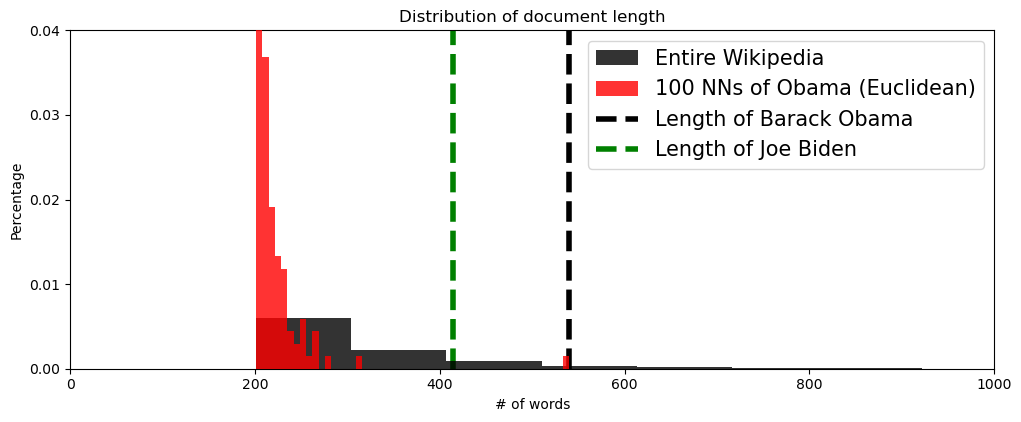

In [43]:
plt.figure(figsize=(10.5,4.5))
plt.hist(wiki['length'], 50, color='k', edgecolor='None', histtype='stepfilled', density=True,
         label='Entire Wikipedia', zorder=3, alpha=0.8)
plt.hist(nearest_neighbors_euclidean['length'], 50, color='r', edgecolor='None', histtype='stepfilled', density=True,
         label='100 NNs of Obama (Euclidean)', zorder=10, alpha=0.8)
plt.axvline(x=wiki['length'][wiki['name'] == 'Barack Obama'].values, color='k', linestyle='--', linewidth=4,
           label='Length of Barack Obama', zorder=2)
plt.axvline(x=wiki['length'][wiki['name'] == 'Joe Biden'].values, color='g', linestyle='--', linewidth=4,
           label='Length of Joe Biden', zorder=1)
plt.axis([0, 1000, 0, 0.04])

plt.legend(loc='best', prop={'size':15})
plt.title('Distribution of document length')
plt.xlabel('# of words')
plt.ylabel('Percentage')
plt.rcParams.update({'font.size':16})
plt.tight_layout()

In [44]:
model2_tf_idf = NearestNeighbors(algorithm='brute', metric='cosine')
model2_tf_idf.fit(tf_idf)
distances, indices = model2_tf_idf.kneighbors(tf_idf[35817], n_neighbors=100)
nearest_neighbors_cosine=pd.DataFrame({'id':indices.flatten(), 'name':wiki['name'].iloc[indices.flatten().tolist()].values, 
                        'length':wiki['length'].iloc[indices.flatten().tolist()].values, 'distance':distances.flatten(), }).sort_values('distance')
print(nearest_neighbors_cosine)

       id                               name  length  distance
0   35817                       Barack Obama     540  0.000000
1   24478                          Joe Biden     414  0.703139
2   38376                     Samantha Power     310  0.742982
3   57108             Hillary Rodham Clinton     580  0.758358
4   38714            Eric Stern (politician)     255  0.770561
..    ...                                ...     ...       ...
95  43760                       Jody Freeman     534  0.875848
96  28267                    Michael C. Dorf     279  0.876000
97  48848  Greg Harris (Illinois politician)     235  0.876418
98    686                 Jesse Jackson, Jr.     206  0.876957
99   5020           Gary Peters (politician)     260  0.876975

[100 rows x 4 columns]


<Figure size 1050x450 with 0 Axes>

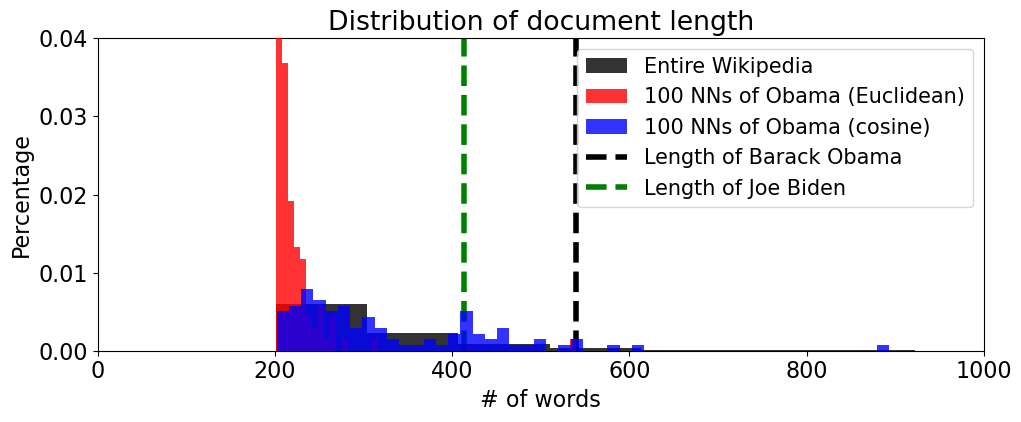

In [45]:
plt.figure(figsize=(10.5,4.5))
plt.figure(figsize=(10.5,4.5))
plt.hist(wiki['length'], 50, color='k', edgecolor='None', histtype='stepfilled', density=True,
         label='Entire Wikipedia', zorder=3, alpha=0.8)
plt.hist(nearest_neighbors_euclidean['length'], 50, color='r', edgecolor='None', histtype='stepfilled', density=True,
         label='100 NNs of Obama (Euclidean)', zorder=10, alpha=0.8)
plt.hist(nearest_neighbors_cosine['length'], 50, color='b', edgecolor='None', histtype='stepfilled', density=True,
         label='100 NNs of Obama (cosine)', zorder=11, alpha=0.8)
plt.axvline(x=wiki['length'][wiki['name'] == 'Barack Obama'].values, color='k', linestyle='--', linewidth=4,
           label='Length of Barack Obama', zorder=2)
plt.axvline(x=wiki['length'][wiki['name'] == 'Joe Biden'].values, color='g', linestyle='--', linewidth=4,
           label='Length of Joe Biden', zorder=1)
plt.axis([0, 1000, 0, 0.04])
plt.legend(loc='best', prop={'size':15})
plt.title('Distribution of document length')
plt.xlabel('# of words')
plt.ylabel('Percentage')
plt.rcParams.update({'font.size': 16})
plt.tight_layout()

In [46]:
tweet = {'act': 3.4597778278724887,
 'control': 3.721765211295327,
 'democratic': 3.1026721743330414,
 'governments': 4.167571323949673,
 'in': 0.0009654063501214492,
 'law': 2.4538226269605703,
 'popular': 2.764478952022998,
 'response': 4.261461747058352,
 'to': 0.04694493768179923}

In [54]:
word_indices = []
for word in tweet.keys():
    for data,idx in map_index_to_word.items():
        if data == word:
            word_indices.append(idx)
            break

In [55]:
word_indices

[547084, 546835, 547347, 546279, 547976, 547685, 547556, 546136, 547972]

In [56]:
tweet_tf_idf = csr_matrix( (list(tweet.values()), ([0]*len(word_indices), word_indices)),
                          shape=(1, tf_idf.shape[1]) )

In [59]:
from sklearn.metrics.pairwise import cosine_distances

obama_tf_idf = tf_idf[35817]
print(cosine_distances(obama_tf_idf, tweet_tf_idf))

[[0.70591838]]


In [60]:
distances, indices = model2_tf_idf.kneighbors(obama_tf_idf, n_neighbors=10)
print(distances)

[[0.         0.70313868 0.7429819  0.7583584  0.77056123 0.7846775
  0.78803907 0.79092642 0.7983226  0.79946636]]
